In [2]:
# imports
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from myterial import amber_dark, blue_dark, green_dark

sys.path.append("./")
sys.path.append(r"C:\Users\Federico\Documents\GitHub\pysical_locomotion")

from fcutils.plot.figure import clean_axes
from fcutils.plot.elements import plot_mean_and_error
from fcutils.progress import track
from analysis.ephys.utils import get_recording_names, get_data, get_session_bouts
from fcutils.maths import derivative

save_folder = Path(r"D:\Dropbox (UCL)\Rotation_vte\Locomotion\analysis\ephys")


units, left_fl, right_fl, left_hl, right_hl, body = get_data(get_recording_names()[3])
units = units.loc[units.brain_region.isin(["MOs", "MOs1", "MOs2/3", "MOs5", "MOs6a", "MOs6b"])]

In [3]:
unit = units.iloc[4]
print(unit)

index                                                                          38
mouse_id                                                               BAA1101192
name                                                 FC_220411_BAA1101192_hairpin
unit_id                                                                       572
site_id                                                                       374
probe_configuration                                                           r96
secondary_sites_ids                           [372, 373, 374, 375, 376, 377, 379]
registered_brain_coordinates    [3022.380017827816, 2056.576820012178, 3925.32...
probe_coordinates                                                            2070
brain_region                                                               MOs2/3
brain_region_id                                                               962
color                                                                     #1f9d5a
spikes_ms       

In [18]:
time = np.arange(len(unit.firing_rate))
unique, counts = np.unique(unit.spikes, return_counts=True)

spikes_time = np.zeros_like(time)
spikes_time[unique] = counts

(177221,)

[<matplotlib.lines.Line2D object at 0x000001EB0EA70A58>]

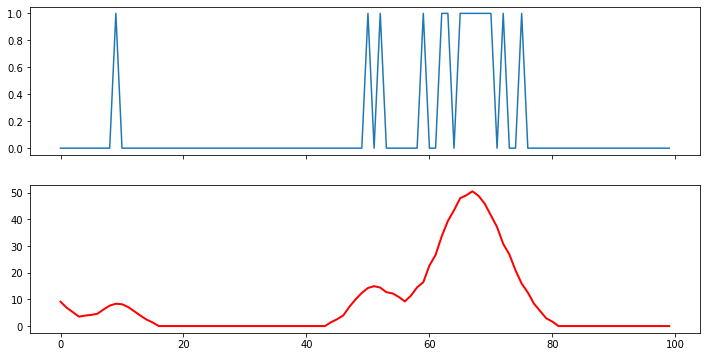

In [27]:

f, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axes[0].plot(spikes_time[1450:1550])
axes[1].plot(unit.firing_rate[1450:1550], lw=2, color="r")